In [2]:
pip install mglearn

     |████████████████████████████████| 542kB 7.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5592a5f1a85b258e1b7d49b7fa231a4946a58838cc1c814ada638fb5749bcca1
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [7]:
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [24]:
file = 'https://raw.githubusercontent.com/jigar-pandit/ml1/master/Tree.csv'
df = pd.read_csv(file)
df.head()

,Day,Outlook,Humidity,Wind,Temperature,Play
0,D1,Sunny,High,Weak,Hot,No
1,D2,Sunny,High,Strong,Hot,No
2,D3,Overcast,High,Weak,Hot,Yes
3,D4,Rain,High,Weak,Mild,Yes
4,D5,Rain,Normal,Weak,Cool,Yes


In [25]:
df = df.drop('Day',axis=1)

#Encoding categorical data values
df['Outlook'] = LabelEncoder().fit_transform(df['Outlook'])
df['Humidity'] = LabelEncoder().fit_transform(df['Humidity'])
df['Wind'] = LabelEncoder().fit_transform(df['Wind'])
df['Temperature'] = LabelEncoder().fit_transform(df['Temperature'])
df['Play'] = LabelEncoder().fit_transform(df['Play'])

df.head()

,Outlook,Humidity,Wind,Temperature,Play
0,2,0,1,1,0
1,2,0,0,1,0
2,0,0,1,1,1
3,1,0,1,2,1
4,1,1,1,0,1


In [26]:
X = df.drop('Play',axis=1)
y = df['Play']
play_tree = DecisionTreeClassifier(random_state=0,criterion='entropy')
play_tree.fit(X.astype(int), y.astype(int))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [27]:
from sklearn.tree import export_graphviz
dot = export_graphviz(play_tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=["no", "yes"],  
                           filled=True, rounded=True,  
                           special_characters=True) 

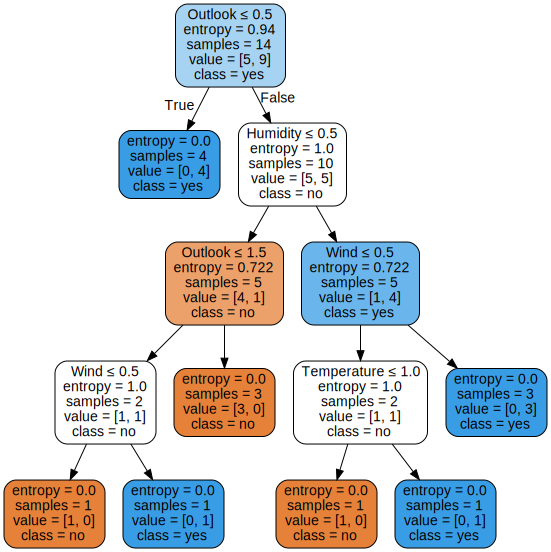

In [28]:
import graphviz
graph = graphviz.Source(dot) 
graph